<a href="https://colab.research.google.com/github/rida-manzoor/ML-Projects/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets

In [2]:
from sklearn.datasets import fetch_openml
titanic = datasets.fetch_openml(name='titanic', version=1, as_frame=True)
df = pd.DataFrame(titanic.data, columns=titanic.feature_names)
df['target'] = titanic.target
df


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,target
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
 13  target     1309 non-null   category
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


In [4]:
df.describe()

,pclass,age,sibsp,parch,fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.837836,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
df['target'].value_counts()

0    809
1    500
Name: target, dtype: int64

In [6]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [7]:
df['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [8]:
df['sibsp'].value_counts()

0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

In [9]:
df['parch'].value_counts()

0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

In [10]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

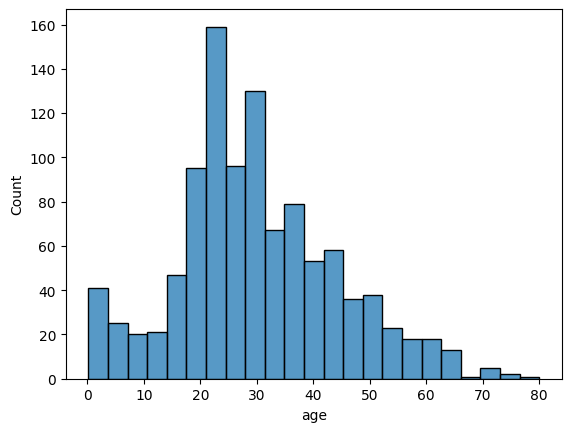

In [11]:
sns.histplot(data=df, x='age');

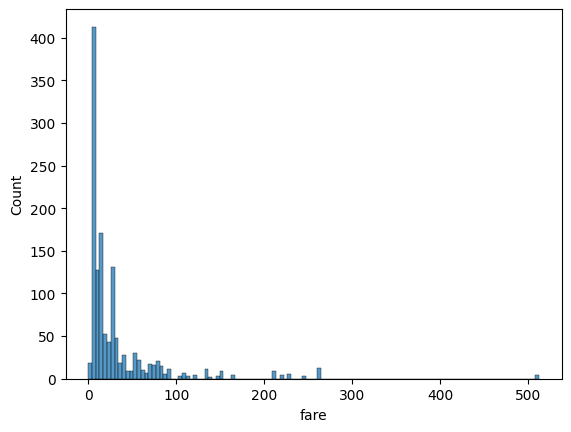

In [12]:
sns.histplot(data=df, x='fare');

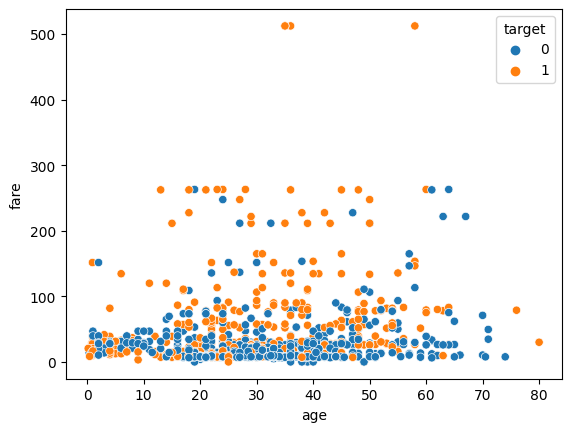

In [13]:
sns.scatterplot(data=df, x='age', y='fare', hue='target');

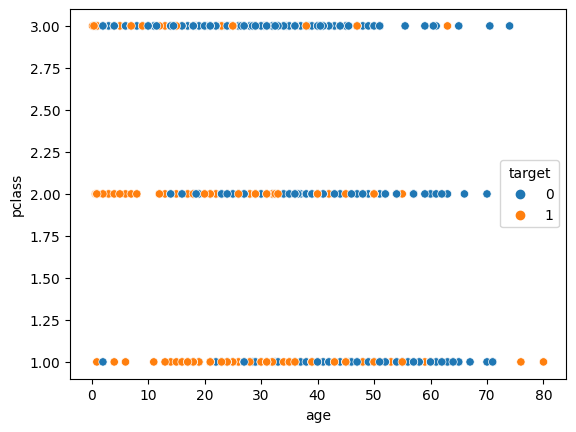

In [14]:
sns.scatterplot(data=df, x='age', y='pclass', hue='target');

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629
age,-0.408106,1.000000,-0.243699,-0.150917,0.178739
sibsp,0.060832,-0.243699,1.000000,0.373587,0.160238
parch,0.018322,-0.150917,0.373587,1.000000,0.221539
fare,-0.558629,0.178739,0.160238,0.221539,1.000000


<ipython-input-16-3d5d91772260>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

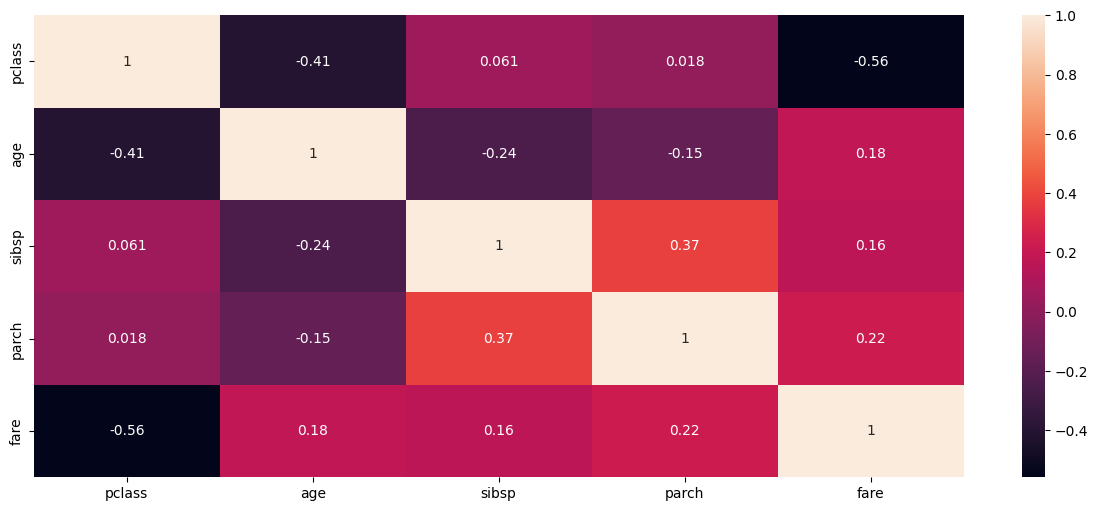

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

In [17]:
df.drop('name', axis=1, inplace=True)

In [18]:
df.drop('home.dest', axis=1, inplace=True)

In [19]:
df.drop('body', axis=1, inplace=True)

In [20]:
df.drop('boat', axis=1, inplace=True)

In [21]:
df.drop('cabin', axis=1, inplace=True)

In [22]:
df['travel_alone'] = np.where((df['sibsp']+df['parch'])>0, 1, 0)

In [23]:
df.drop(['sibsp','parch'], axis=1, inplace=True)
df

,pclass,sex,age,ticket,fare,embarked,target,travel_alone
0,1.0,female,29.0000,24160,211.3375,S,1,0
1,1.0,male,0.9167,113781,151.5500,S,1,1
2,1.0,female,2.0000,113781,151.5500,S,0,1
3,1.0,male,30.0000,113781,151.5500,S,0,1
4,1.0,female,25.0000,113781,151.5500,S,0,1
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,2665,14.4542,C,0,1
1305,3.0,female,NaN,2665,14.4542,C,0,1
1306,3.0,male,26.5000,2656,7.2250,C,0,0
1307,3.0,male,27.0000,2670,7.2250,C,0,0


In [24]:
df['ticket_'] = pd.to_numeric(df['ticket'], errors='coerce')

In [25]:
df.drop('ticket', axis=1, inplace=True)

In [27]:
df

,pclass,sex,age,fare,embarked,target,travel_alone,ticket_
0,1.0,female,29.0000,211.3375,S,1,0,24160.0
1,1.0,male,0.9167,151.5500,S,1,1,113781.0
2,1.0,female,2.0000,151.5500,S,0,1,113781.0
3,1.0,male,30.0000,151.5500,S,0,1,113781.0
4,1.0,female,25.0000,151.5500,S,0,1,113781.0
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,14.4542,C,0,1,2665.0
1305,3.0,female,NaN,14.4542,C,0,1,2665.0
1306,3.0,male,26.5000,7.2250,C,0,0,2656.0
1307,3.0,male,27.0000,7.2250,C,0,0,2670.0


## Missing Values Imputation

In [28]:
from sklearn.impute import SimpleImputer
# define imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [29]:
imp.fit(df.iloc[:,2:4])

SimpleImputer()

In [30]:
df.iloc[:,2:4] = imp.transform(df.iloc[:,2:4])

In [31]:
df.iloc[:,[7]] = imp.fit_transform(df.iloc[:,[7]])

In [34]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.iloc[:,[4]] = imp.fit_transform(df.iloc[:,[4]])

<ipython-input-34-b8cdaee18fa6>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,[4]] = imp.fit_transform(df.iloc[:,[4]])


In [35]:
df.isnull().sum()

pclass          0
sex             0
age             0
fare            0
embarked        0
target          0
travel_alone    0
ticket_         0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        1309 non-null   float64 
 1   sex           1309 non-null   category
 2   age           1309 non-null   float64 
 3   fare          1309 non-null   float64 
 4   embarked      1309 non-null   object  
 5   target        1309 non-null   object  
 6   travel_alone  1309 non-null   int64   
 7   ticket_       1309 non-null   float64 
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 73.1+ KB


In [37]:
df['embarked']

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1309, dtype: object

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_train), len(x_test), len(y_train), len(y_test)

(1047, 262, 1047, 262)

In [39]:
x_train

,pclass,sex,age,fare,embarked,travel_alone,ticket_
509,2.0,male,39.000000,26.0000,S,0,250655.000000
1281,3.0,male,22.000000,9.0000,S,0,345767.000000
569,2.0,male,14.000000,65.0000,S,0,220845.000000
1246,3.0,male,29.881135,16.1000,S,1,376564.000000
735,3.0,female,36.000000,15.9000,S,1,249039.136886
...,...,...,...,...,...,...,...
908,3.0,female,21.000000,9.8250,S,1,4137.000000
233,1.0,female,56.000000,83.1583,C,1,11767.000000
769,3.0,male,22.000000,7.2500,S,0,249039.136886
894,3.0,male,4.000000,11.1333,S,1,347742.000000


In [40]:
x_test

,pclass,sex,age,fare,embarked,travel_alone,ticket_
658,3.0,female,0.750000,19.2583,C,1,2666.000000
357,2.0,male,42.000000,13.0000,S,0,244310.000000
99,1.0,female,48.000000,39.6000,C,1,11755.000000
113,1.0,female,23.000000,263.0000,S,1,19950.000000
434,2.0,female,7.000000,26.2500,S,1,249039.136886
...,...,...,...,...,...,...,...
677,3.0,male,26.000000,7.8958,S,0,349224.000000
1258,3.0,female,29.000000,15.2458,C,1,2650.000000
1284,3.0,male,29.881135,8.0500,S,0,249039.136886
973,3.0,male,29.881135,7.5500,S,0,249039.136886


In [41]:
y_train

509     0
1281    0
569     0
1246    0
735     1
       ..
908     0
233     1
769     0
894     1
177     1
Name: target, Length: 1047, dtype: object

In [42]:
y_test

658     1
357     0
99      1
113     1
434     1
       ..
677     0
1258    1
1284    0
973     0
52      0
Name: target, Length: 262, dtype: object

## Encoding

In [43]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [44]:
x_train

,pclass,sex,age,fare,embarked,travel_alone,ticket_
509,2.0,male,39.000000,26.0000,S,0,250655.000000
1281,3.0,male,22.000000,9.0000,S,0,345767.000000
569,2.0,male,14.000000,65.0000,S,0,220845.000000
1246,3.0,male,29.881135,16.1000,S,1,376564.000000
735,3.0,female,36.000000,15.9000,S,1,249039.136886
...,...,...,...,...,...,...,...
908,3.0,female,21.000000,9.8250,S,1,4137.000000
233,1.0,female,56.000000,83.1583,C,1,11767.000000
769,3.0,male,22.000000,7.2500,S,0,249039.136886
894,3.0,male,4.000000,11.1333,S,1,347742.000000


In [45]:
# OneHotEncoding -> sex,embarked
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

#Call fit() on the training data
ohe.fit(x_train[['sex','embarked']])

#Call transform() on both the training data as well as on the testing data
X_train_sex_embarked = ohe.transform(x_train[['sex','embarked']])
X_test_sex_embarked = ohe.transform(x_test[['sex','embarked']])

X_train_sex_embarked.shape, X_test_sex_embarked.shape


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((1047, 3), (262, 3))

In [46]:
X_train_sex_embarked

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       ...,
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]], dtype=int32)

In [58]:
x_train.drop('sex', axis =1, inplace=True)

In [57]:
x_train.drop('embarked', axis =1, inplace=True)

In [63]:
x_test.drop('sex', axis =1, inplace=True)
x_test.drop('embarked', axis =1, inplace=True)

In [59]:
X_train_transformed = np.concatenate((X_train_sex_embarked, x_train), axis=1)
X_train_transformed.shape

(1047, 8)

In [60]:
X_train_transformed

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.60000000e+01, 0.00000000e+00, 2.50655000e+05],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        9.00000000e+00, 0.00000000e+00, 3.45767000e+05],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        6.50000000e+01, 0.00000000e+00, 2.20845000e+05],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        7.25000000e+00, 0.00000000e+00, 2.49039137e+05],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.11333000e+01, 1.00000000e+00, 3.47742000e+05],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.25542000e+01, 1.00000000e+00, 1.17530000e+04]])

In [61]:
X_train_transformed_df = pd.DataFrame(X_train_transformed)

In [62]:
X_train_transformed_df

,0,1,2,3,4,5,6,7
0,1.0,0.0,1.0,2.0,39.000000,26.0000,0.0,250655.000000
1,1.0,0.0,1.0,3.0,22.000000,9.0000,0.0,345767.000000
2,1.0,0.0,1.0,2.0,14.000000,65.0000,0.0,220845.000000
3,1.0,0.0,1.0,3.0,29.881135,16.1000,1.0,376564.000000
4,0.0,0.0,1.0,3.0,36.000000,15.9000,1.0,249039.136886
...,...,...,...,...,...,...,...,...
1042,0.0,0.0,1.0,3.0,21.000000,9.8250,1.0,4137.000000
1043,0.0,0.0,0.0,1.0,56.000000,83.1583,1.0,11767.000000
1044,1.0,0.0,1.0,3.0,22.000000,7.2500,0.0,249039.136886
1045,1.0,0.0,1.0,3.0,4.000000,11.1333,1.0,347742.000000


In [64]:
X_test_transformed = np.concatenate((X_test_sex_embarked, x_test), axis=1)
X_test_transformed.shape

(262, 8)

In [65]:
X_test_transformed_df = pd.DataFrame(X_test_transformed)
X_test_transformed_df

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,3.0,0.750000,19.2583,1.0,2666.000000
1,1.0,0.0,1.0,2.0,42.000000,13.0000,0.0,244310.000000
2,0.0,0.0,0.0,1.0,48.000000,39.6000,1.0,11755.000000
3,0.0,0.0,1.0,1.0,23.000000,263.0000,1.0,19950.000000
4,0.0,0.0,1.0,2.0,7.000000,26.2500,1.0,249039.136886
...,...,...,...,...,...,...,...,...
257,1.0,0.0,1.0,3.0,26.000000,7.8958,0.0,349224.000000
258,0.0,0.0,0.0,3.0,29.000000,15.2458,1.0,2650.000000
259,1.0,0.0,1.0,3.0,29.881135,8.0500,0.0,249039.136886
260,1.0,0.0,1.0,3.0,29.881135,7.5500,0.0,249039.136886


In [47]:
le = LabelEncoder()

#Call fit() on the training data
le.fit(y_train)

#Call transform() on both the training data as well as on the testing data
y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train.shape, y_test.shape

((1047,), (262,))

In [48]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

## Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
ss.fit(X_train_transformed)
# transform train and test sets
X_train_scaled = ss.transform(X_train_transformed)
X_train_scaled.shape

(1047, 8)

In [68]:
X_test_scaled = ss.transform(X_test_transformed)
X_test_scaled.shape

(262, 8)

## Model Training

In [69]:
from sklearn.linear_model import LogisticRegression

# Instentiate a model and fit it to training data with default hyperparam
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [70]:
model.coef_

array([[-1.13426045, -0.21197219, -0.33212261, -0.73378505, -0.44034083,
        -0.03231064,  0.03584296, -0.0932133 ]])

In [71]:
model.intercept_

array([-0.61621869])

## Evaluation

In [72]:
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[146,  19],
       [ 27,  70]])

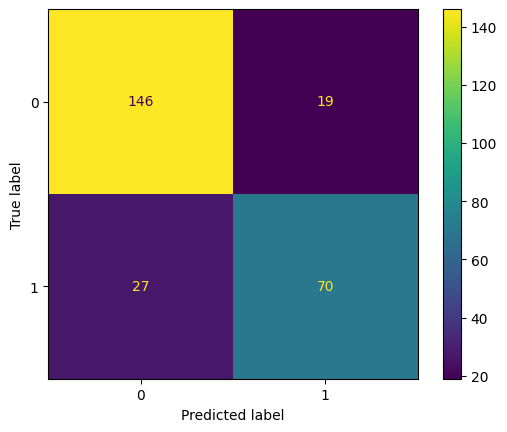

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot();

In [76]:
model_probs = model.predict_proba(X_test_scaled)[:,1]
model_probs

array([0.87502525, 0.14067637, 0.88633931, 0.88580963, 0.86083513,
       0.91297806, 0.89684934, 0.22505711, 0.06407066, 0.10722734,
       0.12960739, 0.19840554, 0.49709565, 0.76283425, 0.08186947,
       0.90618393, 0.09740417, 0.54053271, 0.06686252, 0.34021139,
       0.69437988, 0.36086239, 0.88374794, 0.34158539, 0.09410023,
       0.51312939, 0.71645975, 0.09700183, 0.11399743, 0.11230377,
       0.78658352, 0.18456681, 0.18440017, 0.0891939 , 0.15104861,
       0.1845689 , 0.09903402, 0.09409888, 0.78370856, 0.68270338,
       0.65035914, 0.18456688, 0.1105018 , 0.72024115, 0.68471827,
       0.52489597, 0.11696921, 0.15559657, 0.79504982, 0.08991194,
       0.32332021, 0.05023986, 0.211192  , 0.09161598, 0.38292711,
       0.09770327, 0.12354251, 0.7212795 , 0.10363004, 0.22691179,
       0.14158649, 0.13738394, 0.39220037, 0.12781719, 0.09768294,
       0.09214371, 0.09939784, 0.27511111, 0.14628164, 0.12484592,
       0.57948814, 0.09770254, 0.86585418, 0.10154729, 0.70175

In [78]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=model_probs)
print("FPR: ", fpr)
print("\nTPR: ", tpr)
print("\nThresholds: ", thresholds)

FPR:  [0.         0.         0.         0.00606061 0.00606061 0.01818182
 0.01818182 0.02424242 0.02424242 0.03030303 0.03030303 0.04848485
 0.04848485 0.06060606 0.06060606 0.06666667 0.06666667 0.07878788
 0.07878788 0.08484848 0.08484848 0.1030303  0.1030303  0.10909091
 0.10909091 0.11515152 0.11515152 0.12121212 0.12121212 0.12727273
 0.12727273 0.14545455 0.14545455 0.15757576 0.15757576 0.16969697
 0.16969697 0.21212121 0.21212121 0.22424242 0.22424242 0.23636364
 0.23636364 0.25454545 0.25454545 0.26666667 0.26666667 0.3030303
 0.3030303  0.39393939 0.39393939 0.63030303 0.63030303 0.67272727
 0.67272727 0.67878788 0.67878788 0.73333333 0.75151515 0.77575758
 0.78787879 0.79393939 0.80606061 0.85454545 0.85454545 0.87878788
 0.87878788 0.88484848 0.88484848 1.        ]

TPR:  [0.         0.01030928 0.20618557 0.20618557 0.29896907 0.29896907
 0.34020619 0.34020619 0.39175258 0.39175258 0.45360825 0.45360825
 0.51546392 0.51546392 0.56701031 0.56701031 0.59793814 0.59793814
 0.6

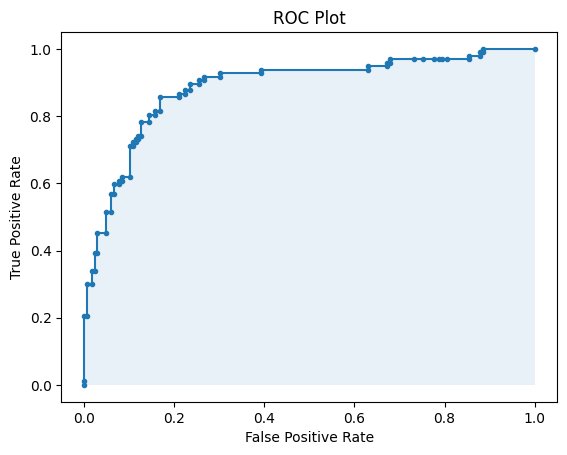

In [79]:
plt.plot(fpr, tpr, marker='.')
plt.fill_between(fpr, tpr, 0, alpha=0.1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score
model_auc= roc_auc_score(y_test, model_probs)
print("Model AUC Score: ", model_auc)

Model AUC Score:  0.8863480162449235


## Hyperparameter tuning

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [81]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Type of penalty (L1 or L2)
    'solver': ['liblinear'],  # Solver algorithm
}

In [82]:
logistic_reg = LogisticRegression()

In [83]:
grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy')

In [84]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [85]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [86]:
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [87]:
accuracy

0.8320610687022901

In [88]:
best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [89]:
best_model

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

## Saving model

In [90]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_logistic_regression_model.pkl')

['best_logistic_regression_model.pkl']

In [ ]:
loaded_model = joblib.load('best_logistic_regression_model.pkl')
new_predictions = loaded_model.predict(X_new)

## Deployment

In [91]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [94]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=d0e470839290f740f3f8c234787d55512e9d69218c365db0a18e5212484916ad
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [97]:
%%writefile my_streamlit_app.py
import streamlit as st


model = joblib.load('best_logistic_regression_model.pkl')
st.title('Titanic Survival Prediction App')
st.write('This is a simple Streamlit app running in Google Colab.')

pclass = st.number_input("Enter pclass")
age = st.number_input('Enter your age')
sex = st.number_input('Enter gender')
fare = st.number_input('Enter fare')
embarked = st.number_input('Enter embarked')
travel_alone = st.number_input('Enter travel_alone')
ticket_ = st.number_input('Enter ticket_')


new = pd.DataFrame({'pclass':pclass, 'sex':sex, agenp3':age, 'fare':fare, 'embarked':embarked, 'travel_alone':travel_alone, 'ticket_':ticket_}, index=[0])

result=""
if st.button("Predict"):
  result = model.predict(new)
  st.subheader("Predicted:")
  st.subheader(result)
else:
  st.subheader("Enter inputs and click Predict button")

Overwriting my_streamlit_app.py


In [98]:
!streamlit run my_streamlit_app.py & ngrok http 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.185.69:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pyngrok/ngrok.py", line 567, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.10/dist-packages/pyngrok/ngrok.py", line 555, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.10/dist-packages/pyngrok/process.py", line 275, in run_process
    subprocess.call(start)
  File "/usr/lib/python3.10/subprocess.py", line 347, in call
    return p.wait(timeout=timeout)
  File "/usr/lib/python3.10/subprocess.py", line 1209, in wait
    return self._wait(timeout=timeout)
  File "/usr/lib/python3.10/subprocess.py", line 1959, in _wait
    (pid, sts) = self._try_wait(0)
  File "/usr/lib/python3.10/subprocess.py", line 1917, in _try_wait
   